# Stock Price Prediction And Forecasting Using Stacked LSTM


In [1]:
### Data Collection
import tensorflow as tf
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import prophet
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
import yfinance as yf
yf.pdr_override()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pdr.get_data_yahoo('ICICIBANK.NS')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,25.418180,25.818180,24.818180,25.127272,17.887016,2047540
2002-07-02,25.454544,27.636362,25.236362,26.745455,19.038931,5546354
2002-07-03,26.727272,28.181818,26.645454,28.090908,19.996706,5745267
2002-07-04,28.181818,28.799999,27.036364,27.390909,19.498405,3896601
2002-07-05,27.090908,27.863636,26.945454,27.672728,19.699017,3261038


In [4]:
df1=df.reset_index()

In [5]:
df1=df1[['Close']]

In [6]:
df1

,Close
0,25.127272
1,26.745455
2,28.090908
3,27.390909
4,27.672728
...,...
5284,938.599976
5285,951.200012
5286,953.099976
5287,954.250000


<Axes: >

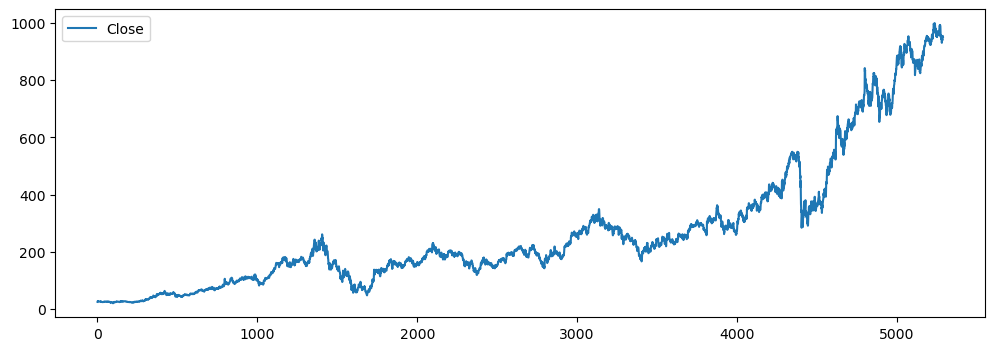

In [7]:
df1.plot(figsize=(12,4))

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [8]:
df1

,Close
0,25.127272
1,26.745455
2,28.090908
3,27.390909
4,27.672728
...,...
5284,938.599976
5285,951.200012
5286,953.099976
5287,954.250000


In [9]:
'''
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
df1 = scaler.fit_transform(df1)

'''

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [10]:
df1

array([[0.00513931],
       [0.00679355],
       [0.00816899],
       ...,
       [0.95379267],
       [0.95496832],
       [0.95195257]])

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(4231, 1058)

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(4130, 100)
(4130,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(957, 100)
(957,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
print(X_train.shape), print(y_train.shape)

(4130, 100, 1)
(4130,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(957, 100, 1)
(957,)


(None, None)

## Create Stacked LSTM Model

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [21]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
#model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
optimizer = Adam(clipvalue=1.0)
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 201701 (787.89 KB)
Trainable params: 201701 (787.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
X_train[0]

array([[0.00513931],
       [0.00679355],
       [0.00816899],
       [0.00745339],
       [0.00774149],
       [0.0073047 ],
       [0.00714671],
       [0.00704448],
       [0.00684002],
       [0.00684002],
       [0.00641252],
       [0.00618018],
       [0.00636605],
       [0.00639393],
       [0.00650546],
       [0.00631029],
       [0.0064404 ],
       [0.00577127],
       [0.00542741],
       [0.00497203],
       [0.00580844],
       [0.00509284],
       [0.0055854 ],
       [0.00635676],
       [0.00559469],
       [0.00493485],
       [0.00479545],
       [0.00487909],
       [0.00468393],
       [0.00466534],
       [0.00442371],
       [0.00441441],
       [0.00404267],
       [0.00404267],
       [0.00439583],
       [0.00471181],
       [0.00454452],
       [0.00460029],
       [0.004433  ],
       [0.00535306],
       [0.00535306],
       [0.00542741],
       [0.00533447],
       [0.00526942],
       [0.00614301],
       [0.00589208],
       [0.00554822],
       [0.005

In [24]:
y_train[0]

0.0022769086713905866

In [25]:
y_train.shape

(4130,)

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace with the desired strategy
y_train = imputer.fit_transform(y_train.reshape(-1, 1))
ytest = imputer.fit_transform(ytest.reshape(-1, 1))

In [27]:
y_train[0]

array([0.00227691])

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
130/130 [==============================] - 22s 140ms/step - loss: 9.4788e-04 - val_loss: 0.0014
Epoch 2/50
130/130 [==============================] - 19s 144ms/step - loss: 1.4095e-04 - val_loss: 0.0016
Epoch 3/50
130/130 [==============================] - 19s 147ms/step - loss: 1.2159e-04 - val_loss: 0.0020
Epoch 4/50
130/130 [==============================] - 19s 150ms/step - loss: 1.1063e-04 - val_loss: 0.0027
Epoch 5/50
130/130 [==============================] - 20s 154ms/step - loss: 1.1882e-04 - val_loss: 0.0024
Epoch 6/50
130/130 [==============================] - 20s 151ms/step - loss: 8.8182e-05 - val_loss: 4.8013e-04
Epoch 7/50
130/130 [==============================] - 19s 149ms/step - loss: 7.8537e-05 - val_loss: 0.0022
Epoch 8/50
130/130 [==============================] - 20s 152ms/step - loss: 8.3081e-05 - val_loss: 4.0941e-04
Epoch 9/50
130/130 [==============================] - 19s 149ms/step - loss: 6.9104e-05 - val_loss: 8.4092e-04
Epoch 10/50
130/130 [====

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

30/30 [==============================] - 1s 36ms/step


In [30]:
train_predict

array([[4.0305965e-04],
       [8.5800141e-04],
       [8.7470189e-04],
       ...,
       [4.2563823e-01],
       [4.2524004e-01],
       [4.2573944e-01]], dtype=float32)

In [31]:
test_predict[0:10]

array([[0.5182172 ],
       [0.51457703],
       [0.51761687],
       [0.52006876],
       [0.52572465],
       [0.5266675 ],
       [0.52838945],
       [0.5307399 ],
       [0.53260124],
       [0.5324522 ]], dtype=float32)

In [32]:
test_data

array([[0.41750154],
       [0.41995502],
       [0.41550807],
       ...,
       [0.95379267],
       [0.95496832],
       [0.95195257]])

In [33]:
test_data_o=scaler.inverse_transform(test_data)

In [34]:
test_data_o

array([[428.5       ],
       [430.8999939 ],
       [426.54998779],
       ...,
       [953.09997559],
       [954.25      ],
       [951.29998779]])

In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
test_predict[0:10]

array([[527.02   ],
       [523.4592 ],
       [526.4328 ],
       [528.83124],
       [534.36383],
       [535.2861 ],
       [536.9705 ],
       [539.2698 ],
       [541.0905 ],
       [540.94476]], dtype=float32)

In [37]:
test_data_o[0:10]

array([[428.5       ],
       [430.8999939 ],
       [426.54998779],
       [427.04998779],
       [422.29998779],
       [424.6000061 ],
       [424.70001221],
       [418.6499939 ],
       [410.29998779],
       [411.5       ]])

In [38]:
print(test_data_o[101:].shape)
print(test_predict.shape)


(957, 1)
(957, 1)


In [39]:

test_data_o = np.reshape(test_data_o[101:], (957, 1))
test_predict_p = np.reshape(test_predict, (957, 1))


In [40]:

test_data_o = np.reshape(test_data_o, 957)
test_predict_p = np.reshape(test_predict, 957)

dataset = pd.DataFrame({'y': test_data_o, 'yhat': test_predict_p}, columns=['y', 'yhat'])


In [41]:
dataset = pd.DataFrame({'y': test_data_o, 'yhat': test_predict_p}, columns=['y', 'yhat'])

In [42]:
dataset

,y,yhat
0,526.500000,527.020020
1,528.700012,523.459229
2,533.549988,526.432800
3,535.349976,528.831238
4,537.049988,534.363831
...,...,...
952,938.599976,935.266174
953,951.200012,935.069092
954,953.099976,925.046875
955,954.250000,945.510986


<Axes: >

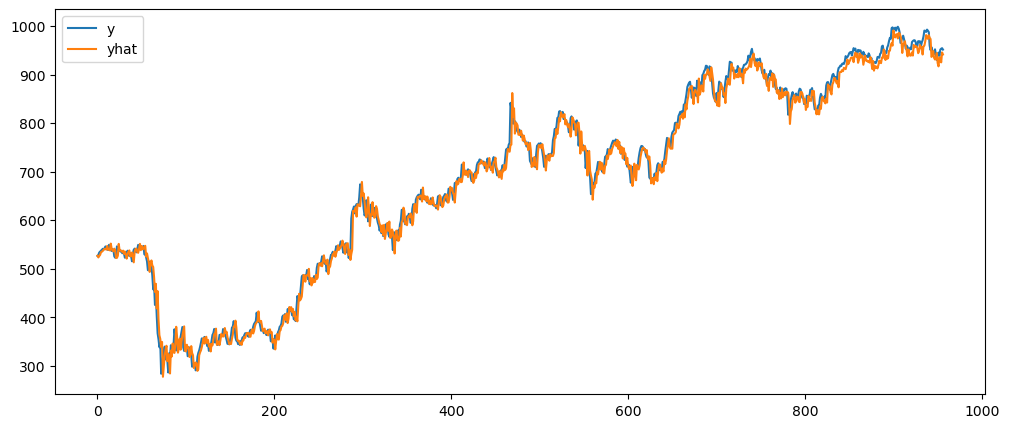

In [43]:
dataset[['y','yhat']].plot(figsize=(12,5))

<Axes: >

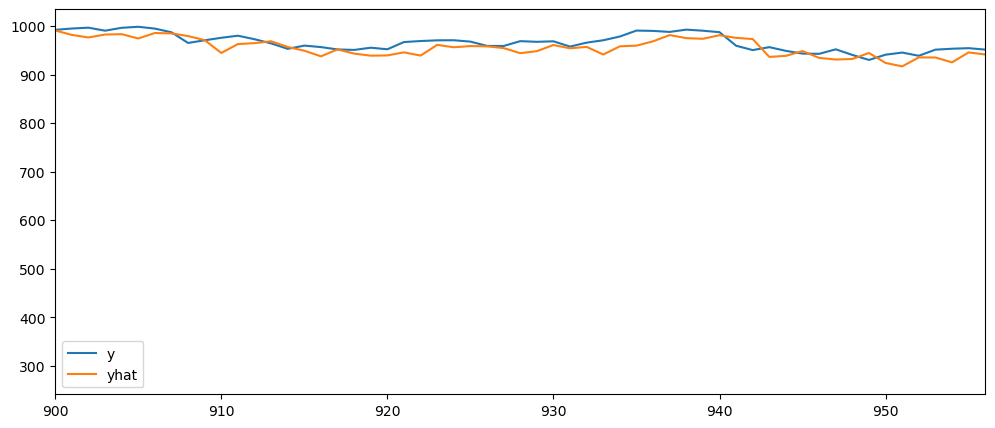

In [44]:
dataset[['y','yhat']].plot(xlim=[900,956],figsize=(12,5))

In [45]:
import numpy as np

nan_indices_y_true = np.isnan(y_train)
nan_indices_train_predict = np.isnan(train_predict)

print("NaN values in y_true:", np.sum(nan_indices_y_true))
print("NaN values in train_predict:", np.sum(nan_indices_train_predict))

NaN values in y_true: 0
NaN values in train_predict: 0


In [46]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

199.51668372448592

In [47]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

706.6197271380238

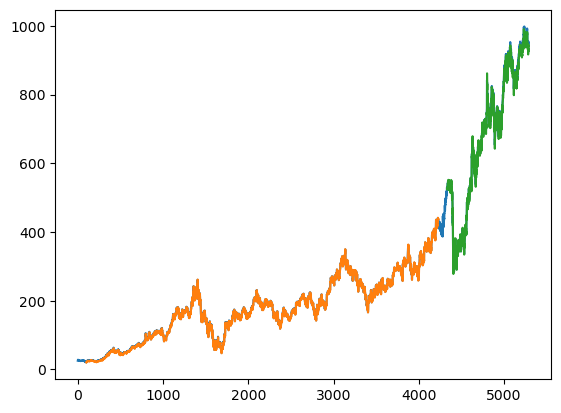

In [48]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [49]:
len(test_data)

1058

In [50]:
x_input=test_data[958:].reshape(1,-1)
x_input.shape

(1, 100)

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [52]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9390124]
101
1 day input [0.94106526 0.94024738 0.95133922 0.9487324  0.9505725  0.94975469
 0.93641381 0.93850954 0.94730118 0.94254752 0.94060522 0.93825397
 0.93840728 0.9362605  0.94402985 0.94019628 0.92670209 0.9344715
 0.92317526 0.9256287  0.92475979 0.92583317 0.92353303 0.92757107
 0.93641381 0.93641381 0.93488038 0.94300756 0.9452055  0.95880189
 0.96023312 0.9469434  0.94898797 0.94546108 0.94489883 0.95645065
 0.96089757 0.96974036 0.97664079 0.97459622 0.99723982 0.99867104
 0.99355961 0.9963198  0.9981088  0.99177061 0.99785322 1.
 0.99616643 0.98839708 0.96595789 0.97158047 0.97684526 0.98118998
 0.97382951 0.96503781 0.9535371  0.96038642 0.95726846 0.9523104
 0.95128812 0.95593951 0.95266818 0.9678491  0.96999594 0.97147826
 0.97163157 0.96876918 0.95972198 0.95956861 0.96974036 0.96836024
 0.96943369 0.95829075 0.9666224  0.97163157 0.97950318 0.99202618
 0.99131057 0.9891638  0.99401965 0.99171951 0.98860155 0.96013085
 0.95093028 0.9571151  0.94929465 0.94356981

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [54]:
len(df1)

5289

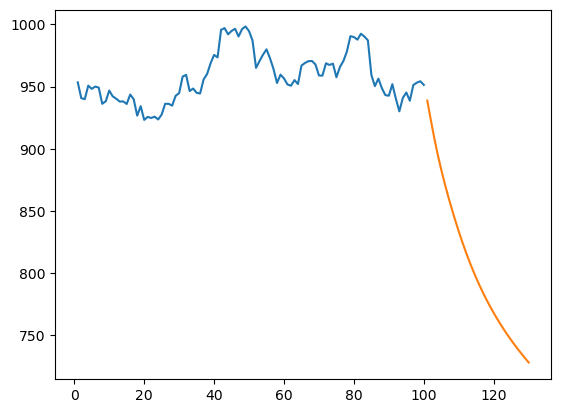

In [55]:
plt.plot(day_new,scaler.inverse_transform(df1[5189:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

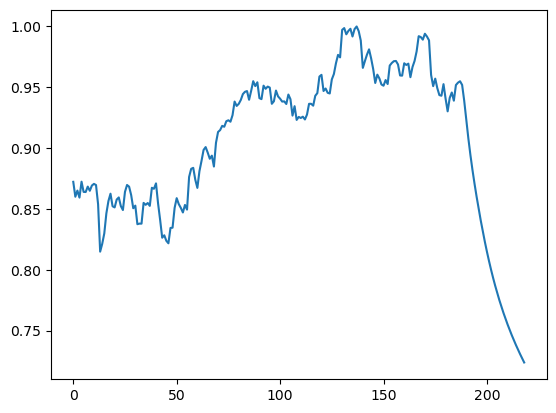

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[5100:])

In [57]:
df3=scaler.inverse_transform(df3).tolist()

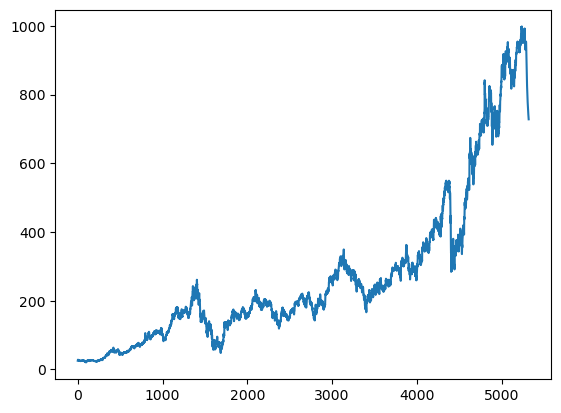

In [58]:
plt.plot(df3)